In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier
import pickle

In [85]:
df = pd.read_csv('Data Analyst Test Dataset.csv')

df.head()

,Applicant ID,Gender,Marital Status,Dependents,Education,Self-Employed,Applicant Income,Co-Applicant Income,Loan Amount,Loan Term,Credit History,Property Area,Loan Status
0,1,Male,Married,3,Master's,No,1661,1353,8833,24,Poor,Rural,Y
1,2,Female,Married,2,Bachelor's,No,2432,1486,5183,24,Good,Urban,N
2,3,Female,Single,1,Bachelor's,No,3116,1947,5147,48,Good,Urban,Y
3,4,Male,Married,1,Bachelor's,No,2094,819,10416,60,Poor,Urban,Y
4,5,Female,Single,3,Bachelor's,No,2762,1698,9327,36,Good,Urban,N


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23748 entries, 0 to 23747
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Applicant ID         23748 non-null  int64 
 1   Gender               23748 non-null  object
 2   Marital Status       23748 non-null  object
 3   Dependents           23748 non-null  int64 
 4   Education            23748 non-null  object
 5   Self-Employed        23748 non-null  object
 6   Applicant Income     23748 non-null  int64 
 7   Co-Applicant Income  23748 non-null  int64 
 8   Loan Amount          23748 non-null  int64 
 9   Loan Term            23748 non-null  int64 
 10  Credit History       23748 non-null  object
 11  Property Area        23748 non-null  object
 12  Loan Status          23748 non-null  object
dtypes: int64(6), object(7)
memory usage: 2.4+ MB


In [87]:
df['Loan Term'] = df['Loan Term'].astype(object)
df['Dependents'] = df['Dependents'].astype(object)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23748 entries, 0 to 23747
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Applicant ID         23748 non-null  int64 
 1   Gender               23748 non-null  object
 2   Marital Status       23748 non-null  object
 3   Dependents           23748 non-null  object
 4   Education            23748 non-null  object
 5   Self-Employed        23748 non-null  object
 6   Applicant Income     23748 non-null  int64 
 7   Co-Applicant Income  23748 non-null  int64 
 8   Loan Amount          23748 non-null  int64 
 9   Loan Term            23748 non-null  object
 10  Credit History       23748 non-null  object
 11  Property Area        23748 non-null  object
 12  Loan Status          23748 non-null  object
dtypes: int64(4), object(9)
memory usage: 2.4+ MB


In [89]:
df['Dependents'].value_counts()

Dependents
3    5958
2    5947
1    5923
0    5920
Name: count, dtype: int64

In [90]:
df.describe()

,Applicant ID,Applicant Income,Co-Applicant Income,Loan Amount
count,23748.000000,23748.000000,23748.000000,23748.000000
mean,11874.500000,3014.742210,1504.836365,8021.717871
std,6855.601432,797.274976,498.930331,1988.201691
min,1.000000,1000.000000,0.000000,512.000000
25%,5937.750000,2474.000000,1165.000000,6669.750000
50%,11874.500000,3011.000000,1504.000000,8028.000000
75%,17811.250000,3554.000000,1840.000000,9357.000000
max,23748.000000,6215.000000,3642.000000,15650.000000


In [91]:
df.describe(include = 'object')

,Gender,Marital Status,Dependents,Education,Self-Employed,Loan Term,Credit History,Property Area,Loan Status
count,23748,23748,23748,23748,23748,23748,23748,23748,23748
unique,2,2,4,3,2,4,2,2,2
top,Female,Married,3,Bachelor's,No,48,Good,Urban,Y
freq,11907,16572,5958,14245,21400,6060,16611,14245,19171


In [92]:
df.isna().sum()

Applicant ID           0
Gender                 0
Marital Status         0
Dependents             0
Education              0
Self-Employed          0
Applicant Income       0
Co-Applicant Income    0
Loan Amount            0
Loan Term              0
Credit History         0
Property Area          0
Loan Status            0
dtype: int64

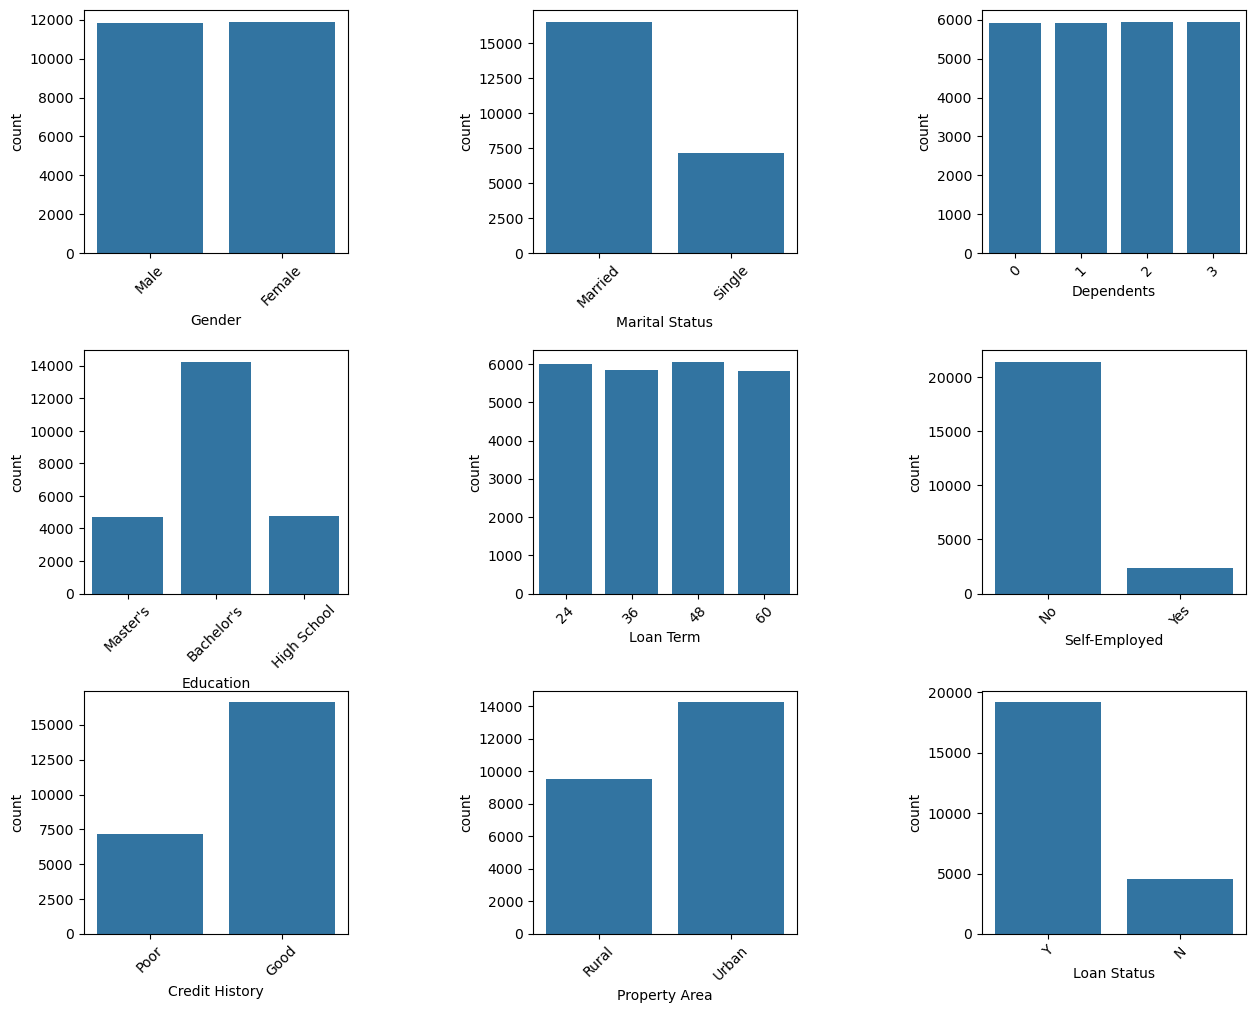

In [93]:
df_cat = ['Gender','Marital Status','Dependents','Education','Loan Term','Self-Employed','Credit History','Property Area','Loan Status']
plt.figure(figsize=(15,12))

for i in range(len(df_cat)):
    plt.subplot(3,3,i+1)
    sns.countplot(data=df, x=df_cat[i])
    plt.xticks(rotation = 45)
plt.subplots_adjust(hspace=0.4, wspace=0.7)
plt.show()

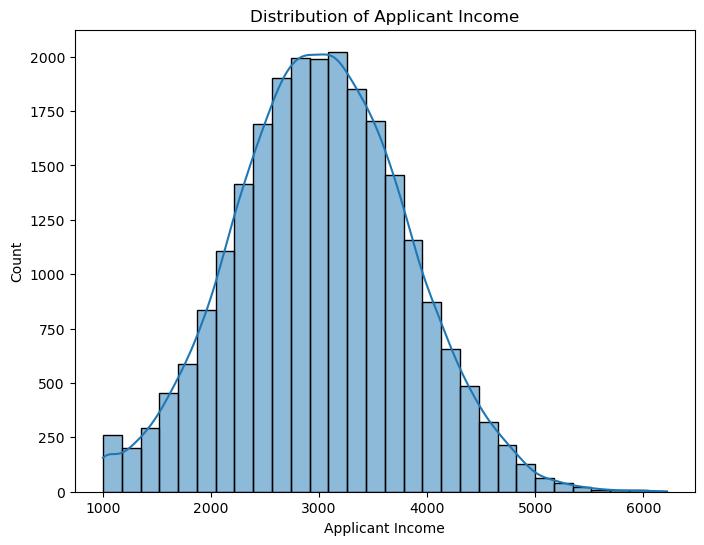

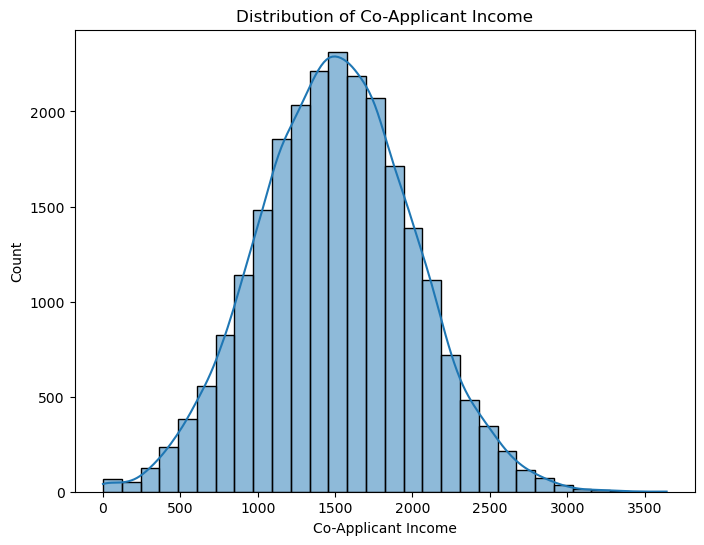

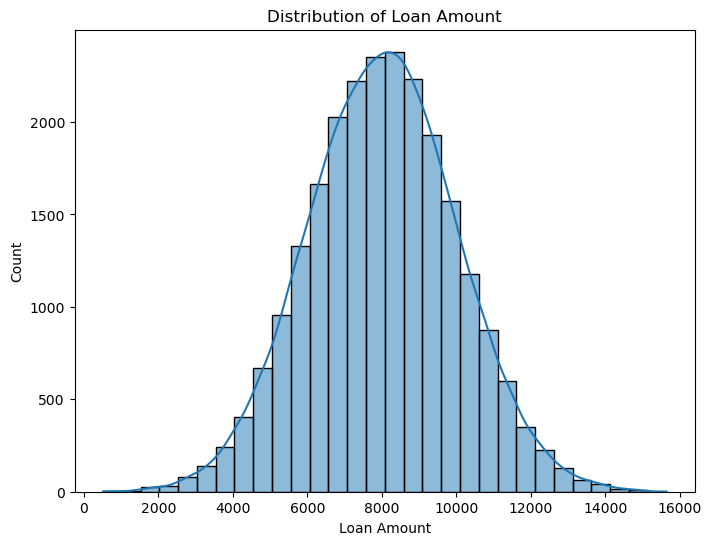

In [94]:
df_num = ['Applicant Income','Co-Applicant Income','Loan Amount']

for i in range(len(df_num)):
    plt.figure(figsize=(8,6))
    sns.histplot(data=df,x=df_num[i], bins=30, kde=True)
    plt.title(f'Distribution of {df_num[i]}')
    plt.xlabel(df_num[i])
    plt.ylabel('Count')
plt.show()


In [95]:
df[['Applicant Income', 'Loan Amount','Co-Applicant Income',]].corr()


,Applicant Income,Loan Amount,Co-Applicant Income
Applicant Income,1.000000,0.005478,0.005235
Loan Amount,0.005478,1.000000,-0.008076
Co-Applicant Income,0.005235,-0.008076,1.000000


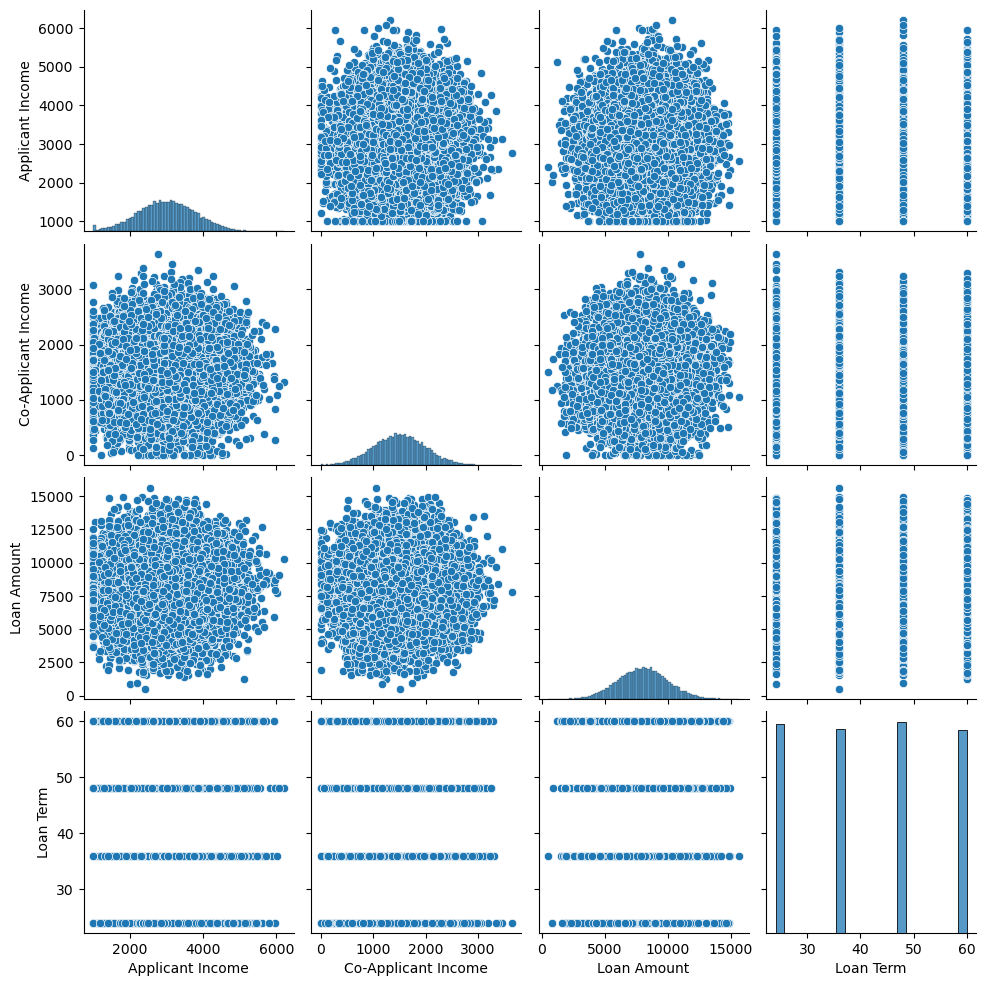

In [96]:
sns.pairplot(df[['Applicant Income', 'Co-Applicant Income', 'Loan Amount', 'Loan Term']])
plt.show()


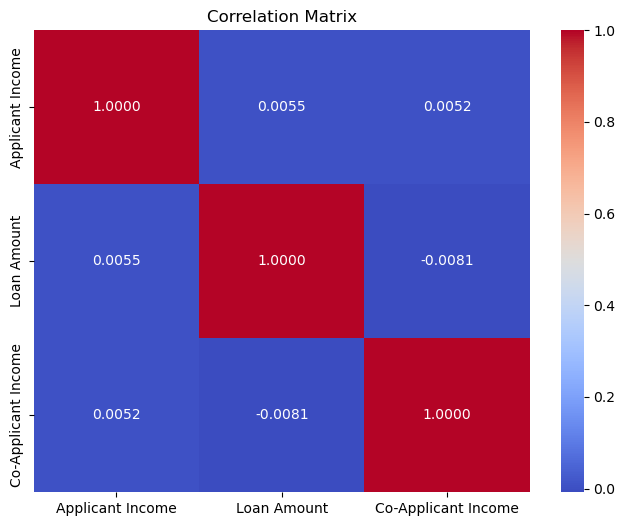

In [97]:
numerical_cols = ['Applicant Income', 'Loan Amount', 'Co-Applicant Income']

correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.4f')
plt.title('Correlation Matrix')
plt.show()


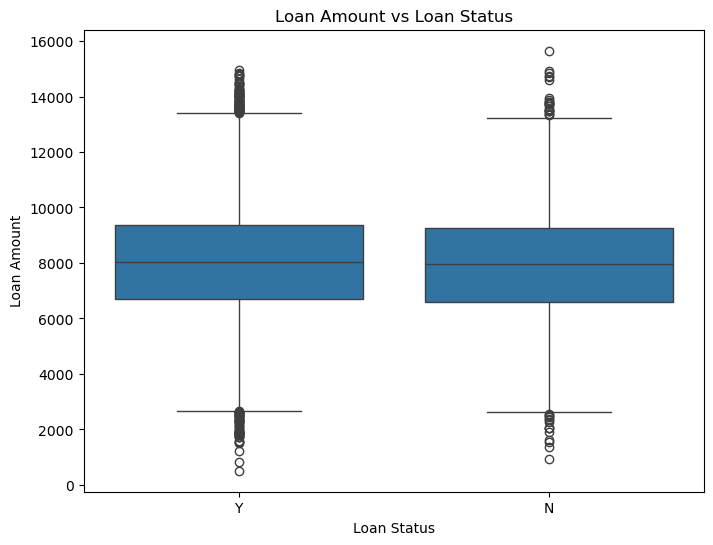

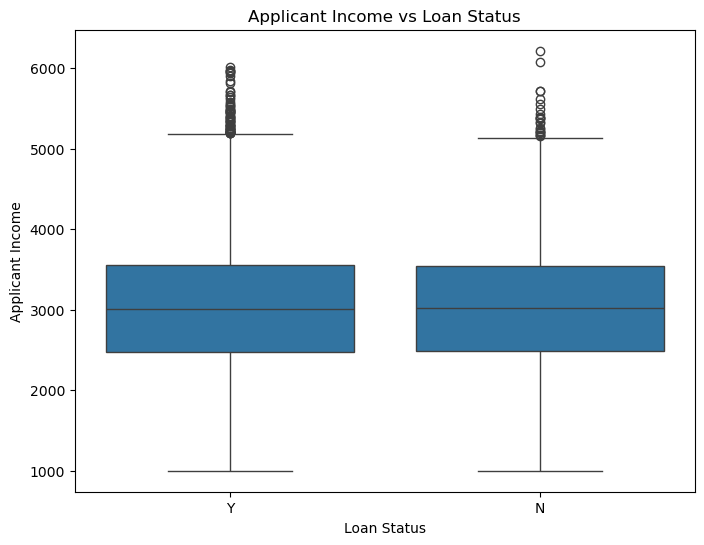

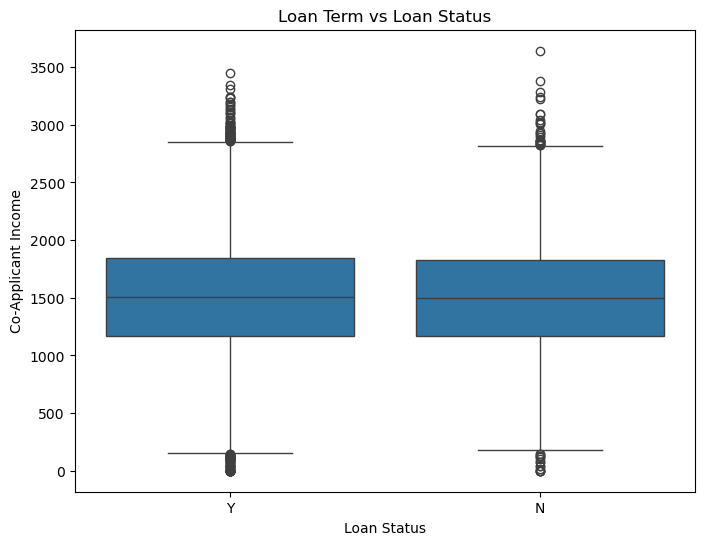

In [98]:
# Boxplot to compare Loan Amount with Loan Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Loan Status', y='Loan Amount', data=df)
plt.title('Loan Amount vs Loan Status')
plt.show()

# Boxplot to compare Applicant Income with Loan Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Loan Status', y='Applicant Income', data=df)
plt.title('Applicant Income vs Loan Status')
plt.show()

# Boxplot to compare Loan Term with Loan Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Loan Status', y='Co-Applicant Income', data=df)
plt.title('Loan Term vs Loan Status')
plt.show()


In [99]:
# Scatter plot between Applicant Income and Loan Amount
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x='Applicant Income', y='Loan Amount', hue='Loan Status', data=df)
# plt.title('Applicant Income vs Loan Amount (Colored by Loan Status)')
# plt.show()

# # Scatter plot between Loan Term and Loan Amount
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x='Loan Term', y='Loan Amount', hue='Loan Status', data=df)
# plt.title('Loan Term vs Loan Amount (Colored by Loan Status)')
# plt.show()


In [100]:
# Grouping by Loan Status and get mean values of Applicant Income, Loan Amount, and Loan Term
loan_status_group = df.groupby('Loan Status')[['Applicant Income', 'Loan Amount', 'Co-Applicant Income']].mean()
print(loan_status_group)


             Applicant Income  Loan Amount  Co-Applicant Income
Loan Status                                                    
N                 3016.652392  7952.824558          1502.796592
Y                 3014.286161  8038.165876          1505.323353


In [101]:
######## How does the loan approval rate vary by gender, education level, and property area?###################

# Approval rates by Gender
approval_rate_by_gender = df.groupby('Gender')['Loan Status'].apply(lambda x: (x == 'Y').mean()).reset_index()
approval_rate_by_gender.columns = ['Gender', 'Approval Rate']

# Approval rates by Education
approval_rate_by_education = df.groupby('Education')['Loan Status'].apply(lambda x: (x == 'Y').mean()).reset_index()
approval_rate_by_education.columns = ['Education', 'Approval Rate']

# Approval rates by Property Area
approval_rate_by_property = df.groupby('Property Area')['Loan Status'].apply(lambda x: (x == 'Y').mean()).reset_index()
approval_rate_by_property.columns = ['Property Area', 'Approval Rate']

# Approval rates by Credit history
approval_rate_by_credit = df.groupby('Credit History')['Loan Status'].apply(lambda x: (x == 'Y').mean()).reset_index()
approval_rate_by_credit.columns = ['Credit History', 'Approval Rate']



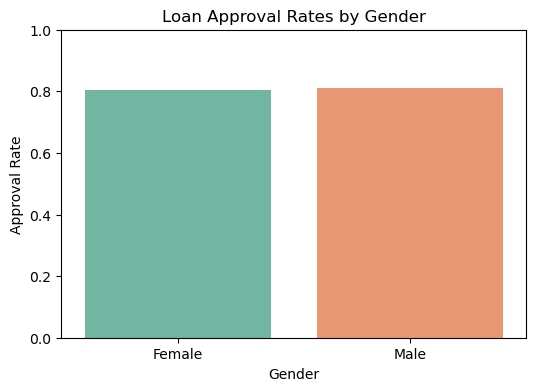

In [102]:
# Barchart for Loan Approval Rates by Gender
plt.figure(figsize=(6, 4))
#sns.barplot(x='Gender', y='Approval Rate', data=approval_rate_by_gender, palette='Set2')
sns.barplot(x='Gender', y='Approval Rate', data=approval_rate_by_gender, hue='Gender', palette='Set2')

plt.title('Loan Approval Rates by Gender')
plt.ylim(0, 1) 
plt.ylabel('Approval Rate')
plt.show()


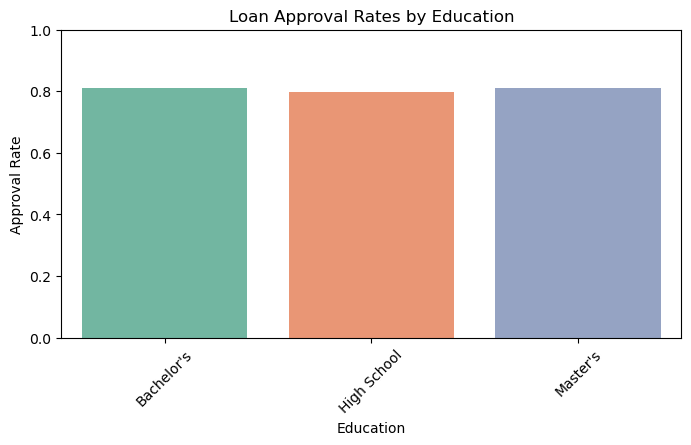

In [103]:
# Bar plot for Loan Approval Rates by Education
plt.figure(figsize=(8, 4))
sns.barplot(x='Education', y='Approval Rate',hue ='Education',  data=approval_rate_by_education, palette='Set2')
plt.title('Loan Approval Rates by Education')
plt.ylim(0, 1)
plt.ylabel('Approval Rate')
plt.xticks(rotation=45) 
plt.show()


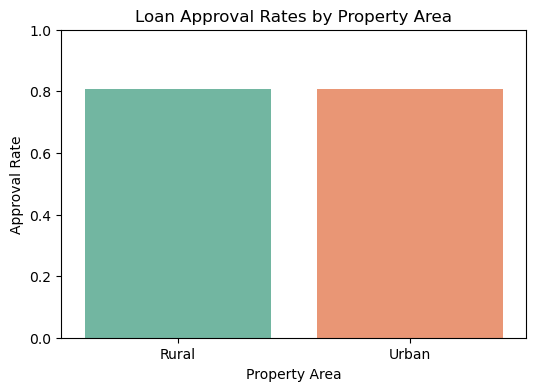

In [104]:
# Bar plot for Loan Approval Rates by Property Area
plt.figure(figsize=(6, 4))
sns.barplot(x='Property Area', y='Approval Rate', hue = 'Property Area', data=approval_rate_by_property, palette='Set2')
plt.title('Loan Approval Rates by Property Area')
plt.ylim(0, 1)
plt.ylabel('Approval Rate')
plt.show()

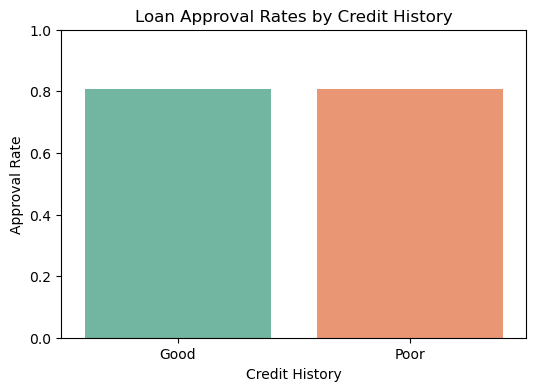

In [105]:
# Barchart for Loan Approval Rates by Credit History
plt.figure(figsize=(6, 4))
#sns.barplot(x='Credit History', y='Approval Rate', data=approval_rate_by_gender, palette='Set2')
sns.barplot(x='Credit History', y='Approval Rate', data=approval_rate_by_credit, hue='Credit History', palette='Set2')

plt.title('Loan Approval Rates by Credit History')
plt.ylim(0, 1) 
plt.ylabel('Approval Rate')
plt.show()



In [106]:
#print(df['Loan Status'].isnull().sum())

In [107]:
# Ensuring 'Loan Status' is treated as a categorical column
df['Loan Status'] = df['Loan Status'].astype('category')


In [108]:
############ Pivot table for Loan Approval Rates by Gender ################
approval_rate_by_gender_pivot = df.pivot_table(values='Applicant ID', index='Gender', 
                                               columns='Loan Status', aggfunc='count', fill_value=0)
approval_rate_by_gender_pivot['Approval Rate'] = approval_rate_by_gender_pivot['Y'] / (approval_rate_by_gender_pivot['Y'] + approval_rate_by_gender_pivot['N'])
#print(approval_rate_by_gender_pivot[['Approval Rate']])
print(approval_rate_by_gender_pivot)

print()
################### Pivot table for Loan Approval Rates by Education #################
approval_rate_by_education_pivot = df.pivot_table(values='Applicant ID', index='Education', 
                                                  columns='Loan Status', aggfunc='count', fill_value=0)
approval_rate_by_education_pivot['Approval Rate'] = approval_rate_by_education_pivot['Y'] / (approval_rate_by_education_pivot['Y'] + approval_rate_by_education_pivot['N'])
#print(approval_rate_by_education_pivot[['Approval Rate']])
print(approval_rate_by_education_pivot)

print()
################## Pivot table for Loan Approval Rates by Property Area #################
approval_rate_by_property_pivot = df.pivot_table(values='Applicant ID', index='Property Area', 
                                                 columns='Loan Status', aggfunc='count', fill_value=0)
approval_rate_by_property_pivot['Approval Rate'] = approval_rate_by_property_pivot['Y'] / (approval_rate_by_property_pivot['Y'] + approval_rate_by_property_pivot['N'])
#print(approval_rate_by_property_pivot[['Approval Rate']])
print(approval_rate_by_property_pivot)

Loan Status     N     Y  Approval Rate
Gender                                
Female       2337  9570       0.803729
Male         2240  9601       0.810827

Loan Status     N      Y  Approval Rate
Education                              
Bachelor's   2719  11526       0.809126
High School   966   3806       0.797569
Master's      892   3839       0.811456

Loan Status       N      Y  Approval Rate
Property Area                            
Rural          1818   7685       0.808692
Urban          2759  11486       0.806318


C:\Users\Evelyn Wullar\AppData\Local\Temp\ipykernel_35716\1170030171.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  approval_rate_by_gender_pivot = df.pivot_table(values='Applicant ID', index='Gender',
C:\Users\Evelyn Wullar\AppData\Local\Temp\ipykernel_35716\1170030171.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  approval_rate_by_education_pivot = df.pivot_table(values='Applicant ID', index='Education',
C:\Users\Evelyn Wullar\AppData\Local\Temp\ipykernel_35716\1170030171.py:18: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning

In [109]:
#print(df[['Gender', 'Marital Status', 'Education', 'Self-Employed', 'Property Area', 'Loan Status']].isnull().sum())

In [110]:
# Check unique values in Education column
print(df['Education'].unique())

print()
print(df['Education'].value_counts())

["Master's" "Bachelor's" 'High School']

Education
Bachelor's     14245
High School     4772
Master's        4731
Name: count, dtype: int64


In [111]:
# Check unique values in Education column
print(df['Loan Term'].unique())

print()
print(df['Loan Term'].value_counts())

[24 48 60 36]

Loan Term
48    6060
24    6009
36    5843
60    5836
Name: count, dtype: int64


In [112]:
# Check unique values in Education column
print(df['Property Area'].unique())

print()
print(df['Property Area'].value_counts())

['Rural' 'Urban']

Property Area
Urban    14245
Rural     9503
Name: count, dtype: int64


In [113]:
# # Calculate Z-scores
# z_scores = stats.zscore(df[['Applicant Income', 'Co-Applicant Income', 'Loan Amount']])

# # Filter out outliers
# df = df[(z_scores < 3).all(axis=1)]


In [114]:
# Visualizing Applicant Income outliers
# plt.figure(figsize=(8, 6))
# sns.boxplot(x=df['Applicant Income'])
# plt.title('Boxplot of Applicant Income')
# plt.show()


In [115]:
# Boxplot for Co-Applicant Income
# sns.boxplot(x=df['Co-Applicant Income'])
# plt.title('Boxplot of Co-Applicant Income')
# plt.show()


In [116]:
# Calculate IQR
Q1 = df['Applicant Income'].quantile(0.25)
Q3 = df['Applicant Income'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

# Detect outliers
outliers = df[(df['Applicant Income'] < lower_bound) | (df['Applicant Income'] > upper_bound)]
print("Number of outliers:", outliers.shape[0])


Lower Bound: 854.0
Upper Bound: 5174.0
Number of outliers: 86


In [117]:
#Feature engineering
# Binning Applicant Income into low, medium, high-income groups
import numpy as np
bins = [0, 2500, 6000, np.inf]
labels = ['Low', 'Medium', 'High']
df['Income Bin'] = pd.cut(df['Applicant Income'], bins=bins, labels=labels)


In [118]:
# Binning Loan Amount into small, medium, large loans
bins = [0, 100000, 300000, np.inf]
labels = ['Small', 'Medium', 'Large']
df['Loan Amount Bin'] = pd.cut(df['Loan Amount'], bins=bins, labels=labels)


In [119]:
#Income to laon ratio
df['Income-to-Loan Ratio'] = df['Applicant Income'] / df['Loan Amount']


In [120]:
#Total Income 
df['Total Income'] = df['Applicant Income'] + df['Co-Applicant Income']


In [121]:
#Loan Term Interaction with Income
df['Income per Term'] = df['Total Income'] / df['Loan Term']


In [122]:
# Group Loan Term into Short, Medium, Long
bins = [0, 180, 360, np.inf]
labels = ['Short Term', 'Medium Term', 'Long Term']
df['Loan Term Category'] = pd.cut(df['Loan Term'], bins=bins, labels=labels)


In [123]:
#Debt to income ratio
df['Debt-to-Income Ratio'] = df['Loan Amount'] / df['Total Income']


In [124]:
# View the first 5 rows of the DataFrame
df.head()


,Applicant ID,Gender,Marital Status,Dependents,Education,Self-Employed,Applicant Income,Co-Applicant Income,Loan Amount,Loan Term,Credit History,Property Area,Loan Status,Income Bin,Loan Amount Bin,Income-to-Loan Ratio,Total Income,Income per Term,Loan Term Category,Debt-to-Income Ratio
0,1,Male,Married,3,Master's,No,1661,1353,8833,24,Poor,Rural,Y,Low,Small,0.188045,3014,125.583333,Short Term,2.930657
1,2,Female,Married,2,Bachelor's,No,2432,1486,5183,24,Good,Urban,N,Low,Small,0.469226,3918,163.25,Short Term,1.322869
2,3,Female,Single,1,Bachelor's,No,3116,1947,5147,48,Good,Urban,Y,Medium,Small,0.605401,5063,105.479167,Short Term,1.016591
3,4,Male,Married,1,Bachelor's,No,2094,819,10416,60,Poor,Urban,Y,Low,Small,0.201037,2913,48.55,Short Term,3.575695
4,5,Female,Single,3,Bachelor's,No,2762,1698,9327,36,Good,Urban,N,Medium,Small,0.296130,4460,123.888889,Short Term,2.091256


In [125]:
# Check data types
#print(df.dtypes)


In [126]:
#Data Modelling

education_map = {'High School':0, "Bachelor's":1, "Master's":2}

# Applying the map to the education column
df['Education'] = df['Education'].map(education_map)


In [127]:
print(df.dtypes)


Applicant ID               int64
Gender                    object
Marital Status            object
Dependents                object
Education                  int64
Self-Employed             object
Applicant Income           int64
Co-Applicant Income        int64
Loan Amount                int64
Loan Term                 object
Credit History            object
Property Area             object
Loan Status             category
Income Bin              category
Loan Amount Bin         category
Income-to-Loan Ratio     float64
Total Income               int64
Income per Term           object
Loan Term Category      category
Debt-to-Income Ratio     float64
dtype: object


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23748 entries, 0 to 23747
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Applicant ID          23748 non-null  int64   
 1   Gender                23748 non-null  object  
 2   Marital Status        23748 non-null  object  
 3   Dependents            23748 non-null  object  
 4   Education             23748 non-null  int64   
 5   Self-Employed         23748 non-null  object  
 6   Applicant Income      23748 non-null  int64   
 7   Co-Applicant Income   23748 non-null  int64   
 8   Loan Amount           23748 non-null  int64   
 9   Loan Term             23748 non-null  object  
 10  Credit History        23748 non-null  object  
 11  Property Area         23748 non-null  object  
 12  Loan Status           23748 non-null  category
 13  Income Bin            23748 non-null  category
 14  Loan Amount Bin       23748 non-null  category
 15  In

In [129]:
cor_df = df[['Applicant Income','Co-Applicant Income', 'Loan Amount','Income-to-Loan Ratio', 'Debt-to-Income Ratio']].corr()
cor_df

,Applicant Income,Co-Applicant Income,Loan Amount,Income-to-Loan Ratio,Debt-to-Income Ratio
Applicant Income,1.000000,0.005235,0.005478,0.599426,-0.546685
Co-Applicant Income,0.005235,1.000000,-0.008076,0.002366,-0.354302
Loan Amount,0.005478,-0.008076,1.000000,-0.667557,0.701532
Income-to-Loan Ratio,0.599426,0.002366,-0.667557,1.000000,-0.775885
Debt-to-Income Ratio,-0.546685,-0.354302,0.701532,-0.775885,1.000000


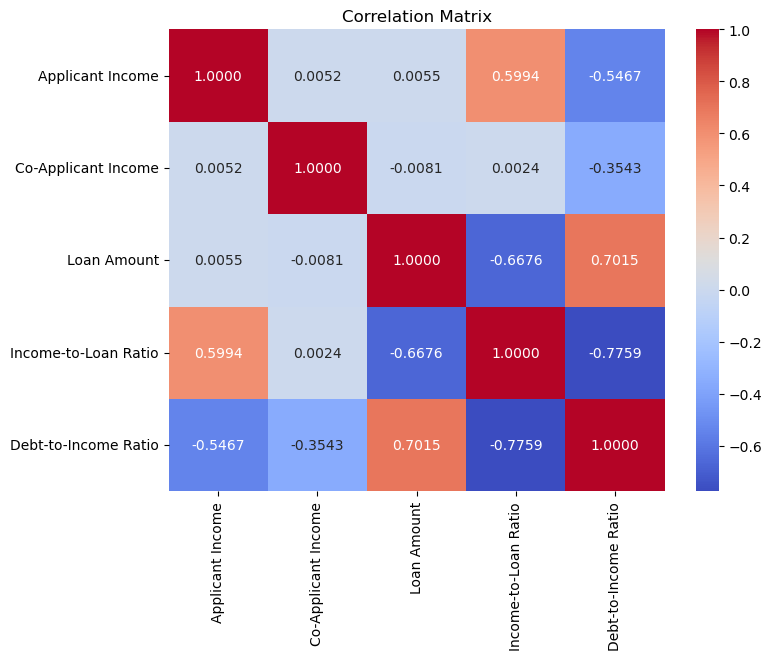

In [130]:

plt.figure(figsize=(8, 6))
sns.heatmap(cor_df, annot=True, cmap='coolwarm', fmt='.4f')
plt.title('Correlation Matrix')
plt.show()

In [201]:
data = df.copy()

In [203]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

# Initialize LabelEncoder
le = LabelEncoder()
oe = OrdinalEncoder()
ohe = OneHotEncoder(sparse_output=False)

#Encode categorical columns
data['Loan Status'] = ohe.fit_transform(data[['Loan Status']])
data['Loan Term Category'] = le.fit_transform(data['Loan Term Category'])
data['Gender'] = le.fit_transform(data['Gender'])
data['Marital Status'] = le.fit_transform(data['Marital Status'])
data['Self-Employed'] = ohe.fit_transform(data[['Self-Employed']])
data['Credit History'] = ohe.fit_transform(data[['Credit History']])
data['Property Area'] = le.fit_transform(data['Property Area'])

In [205]:
# Split the data into features (X) and target (y)
#X = df.drop(columns=['Loan Status','Num','Applicant ID',"Income Bin","Loan Amount Bin","Loan Term Category","Debt-to-Income Ratio"])

X = data.drop(columns=['Loan Status','Applicant ID',"Income Bin","Loan Amount Bin","Loan Term Category",
                     "Debt-to-Income Ratio","Total Income","Income-to-Loan Ratio","Income per Term"])

y = data['Loan Status']   


print(X.shape, y.shape)


(23748, 11) (23748,)


In [189]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# Initialize LabelEncoder for ordinal columns and OneHotEncoder for nominal columns
le = LabelEncoder()
ohe = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' avoids multicollinearity

# Encode binary columns using LabelEncoder
data['Loan Term Category'] = le.fit_transform(data['Loan Term Category'])
data['Gender'] = le.fit_transform(data['Gender'])
data['Marital Status'] = le.fit_transform(data['Marital Status'])
data['Property Area'] = le.fit_transform(data['Property Area'])

# Apply OneHotEncoder for the remaining columns
encoded_columns = ohe.fit_transform(data[['Self-Employed', 'Credit History', 'Loan Status']])

# Convert the encoded columns to a DataFrame
encoded_df = pd.DataFrame(encoded_columns, columns=ohe.get_feature_names_out(['Self-Employed', 'Credit History', 'Loan Status']))

# Drop original columns and concatenate with the encoded columns
data.drop(columns=['Self-Employed', 'Credit History', 'Loan Status'], inplace=True)
data = pd.concat([data, encoded_df], axis=1)


In [209]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

# Check the shape of training and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(16623, 11) (7125, 11) (16623,) (7125,)


In [207]:
X

,Gender,Marital Status,Dependents,Education,Self-Employed,Applicant Income,Co-Applicant Income,Loan Amount,Loan Term,Credit History,Property Area
0,1,0,3,2,1.0,1661,1353,8833,24,0.0,0
1,0,0,2,1,1.0,2432,1486,5183,24,1.0,1
2,0,1,1,1,1.0,3116,1947,5147,48,1.0,1
3,1,0,1,1,1.0,2094,819,10416,60,0.0,1
4,0,1,3,1,1.0,2762,1698,9327,36,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
23743,1,1,0,1,1.0,1401,921,7911,36,1.0,0
23744,0,0,0,1,1.0,3743,1127,6138,36,0.0,0
23745,1,1,3,1,1.0,4806,809,6575,24,0.0,0
23746,0,0,3,0,1.0,3860,753,3570,48,0.0,0


In [217]:
#feature scaling
scaler = StandardScaler()
X_train[['Applicant Income', 'Co-Applicant Income', 'Loan Amount']] = scaler.fit_transform(
    X_train[['Applicant Income', 'Co-Applicant Income', 'Loan Amount']]
)
X_test[['Applicant Income', 'Co-Applicant Income', 'Loan Amount']] = scaler.transform(
    X_test[['Applicant Income', 'Co-Applicant Income', 'Loan Amount']]
)


In [229]:
# Model 1- Logistic regression
#log_model = LogisticRegression(max_iter=1,solver='newton-cholesky')

model = LogisticRegression(max_iter=500)  # Increase the maximum iterations
#model.fit(X_train, y_train)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred))

Accuracy: 0.81
              precision    recall  f1-score   support

         0.0       0.81      1.00      0.89      5752
         1.0       0.00      0.00      0.00      1373

    accuracy                           0.81      7125
   macro avg       0.40      0.50      0.45      7125
weighted avg       0.65      0.81      0.72      7125

0.0


C:\Users\Evelyn Wullar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Evelyn Wullar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Evelyn Wullar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [235]:
################### Model 2 - Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
# accuracy_rf = accuracy_score(y_test, y_pred_rf)
# print(f'Random Forest Accuracy: {accuracy_rf:.2f}')

#Print detailed classification report
print(classification_report(y_test, y_pred_rf))
print(f1_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      1.00      0.89      5752
         1.0       0.25      0.00      0.01      1373

    accuracy                           0.81      7125
   macro avg       0.53      0.50      0.45      7125
weighted avg       0.70      0.81      0.72      7125

0.0


In [237]:
# Saving the trained model as a pickle file
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [239]:
# Loading the model from the pickle file
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Make predictions
predictions = loaded_model.predict(X_test)


,Gender,Marital Status,Dependents,Education,Self-Employed,Applicant Income,Co-Applicant Income,Loan Amount,Loan Term,Credit History,Property Area
4143,0,0,0,0,1.0,-1.142407,-0.614705,-0.428478,36,0.0,1
11556,1,0,3,1,1.0,0.167707,0.782692,-0.813091,24,1.0,1
12174,1,1,1,0,1.0,-1.142407,-0.229216,-0.469758,24,1.0,1
5554,0,0,1,1,1.0,0.844747,0.443382,-0.890618,24,0.0,1
19619,0,0,1,1,1.0,-1.693837,0.148242,-0.231137,36,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
6305,1,0,2,1,1.0,-0.521893,-1.231086,-1.260632,36,0.0,0
19100,0,0,0,1,0.0,1.544396,0.521684,-1.736868,24,0.0,1
5459,1,0,0,2,1.0,-1.383579,-0.132844,-1.359806,60,1.0,0
1212,0,0,3,1,1.0,-2.265363,-0.363736,-1.333628,60,1.0,0
